# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Google Sheet

In [2]:
# file path
revenue = "https://docs.google.com/spreadsheets/d/19VR7hpDtltDpUb_mQ4IM9wQaZ5BWDvmBa9z59iF1XmI/export?format=csv&gid=236842997"
plan = "https://docs.google.com/spreadsheets/d/1TWUCkiKTBbKStRh4KWBvbnGZ0Q52bDUR7Sn7p56jZ4o/export?format=csv&gid=446101760"
countries = "https://docs.google.com/spreadsheets/d/1RSfVSPFOZaJlyZB7445CWL2o29Yp1gZLihzjxB9W3XM/export?format=csv&gid=1444504568"
subscription = "https://docs.google.com/spreadsheets/d/1rmOipzdLHRyLHe3Rj_X1QFMq46MpWQe6YGuHonq25mg/export?format=csv&gid=290598938"
customers = "https://docs.google.com/spreadsheets/d/1XrHNPa79V9HHTTA5UVSclKrO6AWmOld68bRlBk136G8/export?format=csv&gid=1064211377"

# Read directly into Pandas DataFrame
df_revenue = pd.read_csv(revenue)
df_plan = pd.read_csv(plan)
df_countries = pd.read_csv(countries)
df_subscription = pd.read_csv(subscription)
df_customers = pd.read_csv(customers)

In [3]:
df_revenue.head()

,order_id,transaction_id,payment_date,amount,plan_id,payment_method,coupon_code
0,ORD000083071,56E2321457954E9AB02489B196C16449,"Sunday, March 23, 2025",69.45,2,google_pay,SPRING20
1,ORD000030497,E68ACDA4ED594B03856431919C29CDCD,2025-01-02,81.27,3,apple_pay,NaN
2,ORD000082941,5E4592F614254DEFA383B47A4A99C2F8,2025-08-11,140.42,2,paypal,NaN
3,ORD000002640,7C57DDAC85DF4910A9D0D1B0BCCCB15E,"Sunday, March 2, 2025",32.62,1,bank_transfer,NaN
4,ORD000002641,00399D7FD2EF4DFC8B3218AAACCFCB77,"Monday, May 5, 2025",82.55,3,bank_transfer,NaN


In [4]:
df_plan.head()

,plan_name,Id
0,12-Month,2
1,6-Month,3
2,3-Month,1
3,Monthly,4


In [5]:
df_countries.head()

,id,country_name
0,105,Samoa
1,106,Angola
2,107,Republic of the Congo
3,108,Austria
4,109,Portugal


In [6]:
df_subscription.head()

,id,customer_id,order_id,plan_id
0,101,1007,ORD000083071,2
1,102,1008,ORD000030497,3
2,103,1009,ORD000082941,2
3,104,1010,ORD000002640,1
4,105,1010,ORD000002641,3


In [7]:
df_customers.head()

,id,email,name,country_id
0,1007,adela.abebe3614@yahoo.com,Adela Abebe,105
1,1008,adela.abebe4450@gmail.com,Adela Abebe,106
2,1009,adela.abebe483@gmail.com,Adela Abebe,106
3,1010,adela.abebe7189@gmail.com,Adela Abebe,107
4,1011,adela.abebe8628@yahoo.com,Adela Abebe,108


# Step 3: Data Cleaning & Wrangling

In [8]:
print("Rows:", df_revenue.shape[0])
print("Columns:", df_revenue.shape[1])

Rows: 101071
Columns: 7


In [9]:
df_revenue.columns

Index(['order_id', 'transaction_id', 'payment_date', 'amount', 'plan_id',
       'payment_method', 'coupon_code'],
      dtype='object')

In [10]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101071 entries, 0 to 101070
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   order_id        101071 non-null  object
 1   transaction_id  101071 non-null  object
 2   payment_date    101071 non-null  object
 3   amount          101071 non-null  object
 4   plan_id         101071 non-null  int64 
 5   payment_method  101071 non-null  object
 6   coupon_code     38599 non-null   object
dtypes: int64(1), object(6)
memory usage: 5.4+ MB


In [11]:
df_revenue.isnull().sum()

,0
order_id,0
transaction_id,0
payment_date,0
amount,0
plan_id,0
payment_method,0
coupon_code,62472


Convert payment_date to datetime

In [12]:
date_formats = [
    '%Y-%m-%d',        # e.g., 2025-01-02
    '%A, %B %d, %Y'    # e.g., Sunday, March 23, 2025
]

def parse_mixed_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # if no format matches

df_revenue['payment_date'] = df_revenue['payment_date'].apply(parse_mixed_dates)

In [13]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101071 entries, 0 to 101070
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        101071 non-null  object        
 1   transaction_id  101071 non-null  object        
 2   payment_date    101071 non-null  datetime64[ns]
 3   amount          101071 non-null  object        
 4   plan_id         101071 non-null  int64         
 5   payment_method  101071 non-null  object        
 6   coupon_code     38599 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.4+ MB


In [14]:
df_revenue.isnull().sum()

,0
order_id,0
transaction_id,0
payment_date,0
amount,0
plan_id,0
payment_method,0
coupon_code,62472


In [15]:
df_revenue['coupon_code'] = df_revenue['coupon_code'].fillna('No Coupon')

In [16]:
df_revenue.head()

,order_id,transaction_id,payment_date,amount,plan_id,payment_method,coupon_code
0,ORD000083071,56E2321457954E9AB02489B196C16449,2025-03-23,69.45,2,google_pay,SPRING20
1,ORD000030497,E68ACDA4ED594B03856431919C29CDCD,2025-01-02,81.27,3,apple_pay,No Coupon
2,ORD000082941,5E4592F614254DEFA383B47A4A99C2F8,2025-08-11,140.42,2,paypal,No Coupon
3,ORD000002640,7C57DDAC85DF4910A9D0D1B0BCCCB15E,2025-03-02,32.62,1,bank_transfer,No Coupon
4,ORD000002641,00399D7FD2EF4DFC8B3218AAACCFCB77,2025-05-05,82.55,3,bank_transfer,No Coupon


In [17]:
df_revenue.isnull().sum()

,0
order_id,0
transaction_id,0
payment_date,0
amount,0
plan_id,0
payment_method,0
coupon_code,0


In [18]:
df_revenue.duplicated().sum()


np.int64(10913)

In [19]:
df_revenue[df_revenue.duplicated()]


,order_id,transaction_id,payment_date,amount,plan_id,payment_method,coupon_code
23,ORD000023117,6215C850D3E94DE78F9218881C96DFAD,2025-10-03,8.11,4,bank_transfer,No Coupon
24,ORD000023117,6215C850D3E94DE78F9218881C96DFAD,2025-10-03,8.11,4,bank_transfer,No Coupon
28,ORD000040577,9BD727F3C84E471A89F108261A6837C1,2025-04-09,8.79,4,apple_pay,No Coupon
31,ORD000040576,C06D68FA82204A56A2237220F5100151,2025-10-04,56.11,3,apple_pay,No Coupon
40,ORD000011435,A8B18B5B6C4A4AF3A1AE46DE9B06F53E,2025-08-19,14.36,4,bank_transfer,No Coupon
...,...,...,...,...,...,...,...
101048,ORD000087990,9B4A1373BF6546F7BDDCA34BE788A194,2025-09-04,68.72,3,google_pay,No Coupon
101049,ORD000087990,9B4A1373BF6546F7BDDCA34BE788A194,2025-09-04,68.72,3,google_pay,No Coupon
101051,ORD000087990,9B4A1373BF6546F7BDDCA34BE788A194,2025-09-04,68.72,3,google_pay,No Coupon
101053,ORD000002574,BE5916AA72284605833AB0EBD6C1D96A,2025-01-08,34.22,1,google_pay,No Coupon


In [20]:
df_revenue['transaction_id'].duplicated().sum()

np.int64(18947)

In [21]:
df_countries.isnull().sum()

,0
id,0
country_name,0


In [22]:
df_countries.duplicated().sum()

np.int64(0)

In [23]:
df_subscription.isnull().sum()

,0
id,0
customer_id,0
order_id,0
plan_id,0


In [24]:
df_subscription['id'].duplicated().sum()

np.int64(0)

In [25]:
df_customers.isnull().sum()

,0
id,0
email,1
name,0
country_id,0


In [26]:
df_customers[df_customers['email'].isna()]

,id,email,name,country_id
36301,37308,NaN,Giulia Torres,127


In [27]:
df_customers['email'].duplicated().sum()

np.int64(0)

In [28]:
df_customers['id'].duplicated().sum()

np.int64(0)

## Standardize column names

### Subtask:
Ensure all column names are in a consistent format (e.g., lowercase, no spaces).

**Reasoning**:
Define a function to clean column names by converting to lowercase and replacing spaces with underscores, and then apply this function to all DataFrames.

In [29]:
def clean_column_names(df):
    """Converts column names to lowercase and replaces spaces with underscores."""
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

# Apply the cleaning function to all dataframes
df_revenue = clean_column_names(df_revenue)
df_plan = clean_column_names(df_plan)
df_countries = clean_column_names(df_countries)
df_subscription = clean_column_names(df_subscription)
df_customers = clean_column_names(df_customers)

print("Cleaned column names:")
print("df_revenue columns:", df_revenue.columns.tolist())
print("df_plan columns:", df_plan.columns.tolist())
print("df_countries columns:", df_countries.columns.tolist())
print("df_subscription columns:", df_subscription.columns.tolist())
print("df_customers columns:", df_customers.columns.tolist())

Cleaned column names:
df_revenue columns: ['order_id', 'transaction_id', 'payment_date', 'amount', 'plan_id', 'payment_method', 'coupon_code']
df_plan columns: ['plan_name', 'id']
df_countries columns: ['id', 'country_name']
df_subscription columns: ['id', 'customer_id', 'order_id', 'plan_id']
df_customers columns: ['id', 'email', 'name', 'country_id']




# Merge and Consolidated Data

In [36]:
# Merge df_revenue and df_subscription on 'order_id'
df_merged = pd.merge(df_revenue, df_subscription, on='order_id', how='left')

# Rename the 'id' column in df_plan to 'plan_id' for merging
df_plan = df_plan.rename(columns={'id': 'plan_id'})

# Rename the plan_id column from the revenue dataframe in the merged dataframe
df_merged = df_merged.rename(columns={'plan_id_x': 'plan_id'})

# Merge the result with df_plan on 'plan_id'
df_merged = pd.merge(df_merged, df_plan, on='plan_id', how='left')

# Merge the result with df_customers on 'customer_id'
df_merged = pd.merge(df_merged, df_customers, left_on='customer_id', right_on='id', how='left')

# Merge the result with df_countries on 'country_id'
df_merged = pd.merge(df_merged, df_countries, left_on='country_id', right_on='id', how='left')

# Drop redundant 'id' columns from the merges (from df_subscription, df_customers, and df_countries)
df_merged = df_merged.drop(columns=['id_x', 'id_y', 'id'])

# Rename the plan_id column from the subscription dataframe in the merged dataframe
df_merged = df_merged.rename(columns={'plan_id_y': 'subscription_plan_id'})

# Drop the redundant 'subscription_plan_id' column as it's identical to 'plan_id'
df_merged = df_merged.drop(columns=['subscription_plan_id'])


# Display the first few rows of the merged dataframe
display(df_merged.head())

,order_id,transaction_id,payment_date,amount,plan_id,payment_method,coupon_code,customer_id,plan_name,email,name,country_id,country_name
0,ORD000083071,56E2321457954E9AB02489B196C16449,2025-03-23,69.45,2,google_pay,SPRING20,1007,12-Month,adela.abebe3614@yahoo.com,Adela Abebe,105,Samoa
1,ORD000030497,E68ACDA4ED594B03856431919C29CDCD,2025-01-02,81.27,3,apple_pay,No Coupon,1008,6-Month,adela.abebe4450@gmail.com,Adela Abebe,106,Angola
2,ORD000082941,5E4592F614254DEFA383B47A4A99C2F8,2025-08-11,140.42,2,paypal,No Coupon,1009,12-Month,adela.abebe483@gmail.com,Adela Abebe,106,Angola
3,ORD000002640,7C57DDAC85DF4910A9D0D1B0BCCCB15E,2025-03-02,32.62,1,bank_transfer,No Coupon,1010,3-Month,adela.abebe7189@gmail.com,Adela Abebe,107,Republic of the Congo
4,ORD000002641,00399D7FD2EF4DFC8B3218AAACCFCB77,2025-05-05,82.55,3,bank_transfer,No Coupon,1010,6-Month,adela.abebe7189@gmail.com,Adela Abebe,107,Republic of the Congo


In [35]:
# Check if the 'plan_id' and 'subscription_plan_id' columns are identical
are_identical = (df_merged['plan_id'] == df_merged['subscription_plan_id']).all()

if are_identical:
    print("The 'plan_id' and 'subscription_plan_id' columns are identical.")
else:
    print("The 'plan_id' and 'subscription_plan_id' columns are NOT identical. Checking for discrepancies...")
    # Display rows where the columns differ
    discrepancies = df_merged[df_merged['plan_id'] != df_merged['subscription_plan_id']]
    if not discrepancies.empty:
        display(discrepancies[['order_id', 'plan_id', 'subscription_plan_id']].head())
    else:
        print("No discrepancies found despite the 'all()' check returning False. This is unexpected and might require further investigation.")

The 'plan_id' and 'subscription_plan_id' columns are identical.


In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159569 entries, 0 to 159568
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        159569 non-null  object        
 1   transaction_id  159569 non-null  object        
 2   payment_date    159569 non-null  datetime64[ns]
 3   amount          159569 non-null  object        
 4   plan_id         159569 non-null  int64         
 5   payment_method  159569 non-null  object        
 6   coupon_code     159569 non-null  object        
 7   customer_id     159569 non-null  int64         
 8   plan_name       159569 non-null  object        
 9   email           150741 non-null  object        
 10  name            159569 non-null  object        
 11  country_id      159569 non-null  int64         
 12  country_name    159569 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 15.8+ MB


In [38]:
print("Rows:", df_merged.shape[0])
print("Columns:", df_merged.shape[1])

Rows: 159569
Columns: 13


# Task
Analyze the purchase behavior of customers by country, segmenting them into two cohorts based on whether their first purchase used a promotion coupon (Cohort A: Non-Offer First Joiners, Cohort B: Offer First Joiners). Calculate the following metrics for each country and cohort: total unique customers, total revenue from first purchases, number of repeat buyers, and total revenue from repeat purchases. Present the results in a detailed, insightful, and actionable format that can help management make decisions.

## Identify first purchase

### Subtask:
Determine the first purchase date and whether a coupon was used for each customer.


**Reasoning**:
Sort the merged dataframe by customer and payment date, then group by customer and get the first row to identify the first purchase and whether a coupon was used for that purchase.



In [39]:
# Sort the DataFrame by customer_id and payment_date
df_sorted = df_merged.sort_values(by=['customer_id', 'payment_date'])

# Group by customer_id and get the first purchase for each customer
df_first_purchase = df_sorted.groupby('customer_id').first().reset_index()

# Select the relevant columns for the first purchase
df_first_purchase = df_first_purchase[['customer_id', 'payment_date', 'coupon_code']]

# Create a boolean column indicating whether a coupon was used on the first purchase
df_first_purchase['used_coupon_first_purchase'] = df_first_purchase['coupon_code'] != 'No Coupon'

# Display the first few rows of the new dataframe
display(df_first_purchase.head())

,customer_id,payment_date,coupon_code,used_coupon_first_purchase
0,1007,2025-03-23,SPRING20,True
1,1008,2025-01-02,No Coupon,False
2,1009,2025-08-11,No Coupon,False
3,1010,2025-03-02,No Coupon,False
4,1011,2025-01-16,No Coupon,False


## Define cohorts

### Subtask:
Assign each customer to either Cohort A (Non-Offer First Joiners) or Cohort B (Offer First Joiners) based on their first purchase.


**Reasoning**:
Merge the `df_merged` and `df_first_purchase` DataFrames and assign cohorts based on the 'used_coupon_first_purchase' column.



In [40]:
# Merge df_merged with df_first_purchase on 'customer_id'
df_merged = pd.merge(df_merged, df_first_purchase[['customer_id', 'used_coupon_first_purchase']], on='customer_id', how='left')

# Create the 'cohort' column based on 'used_coupon_first_purchase'
df_merged['cohort'] = df_merged['used_coupon_first_purchase'].apply(lambda x: 'Offer First Joiners' if x else 'Non-Offer First Joiners')

# Display the first few rows with the new 'cohort' column
display(df_merged[['customer_id', 'payment_date', 'coupon_code', 'used_coupon_first_purchase', 'cohort']].head())

,customer_id,payment_date,coupon_code,used_coupon_first_purchase,cohort
0,1007,2025-03-23,SPRING20,True,Offer First Joiners
1,1008,2025-01-02,No Coupon,False,Non-Offer First Joiners
2,1009,2025-08-11,No Coupon,False,Non-Offer First Joiners
3,1010,2025-03-02,No Coupon,False,Non-Offer First Joiners
4,1010,2025-05-05,No Coupon,False,Non-Offer First Joiners


## Calculate cohort metrics by country

### Subtask:
For each country and each cohort, calculate the requested metrics: total unique customers in the cohort, total revenue from first purchases, number of repeat buyers, and total revenue from repeat purchases.


**Reasoning**:
Convert the 'amount' column to numeric and handle missing values, then merge df_first_purchase with df_merged to link first purchases with revenue, and finally filter df_merged to identify repeat purchases. These steps set up the data for calculating the requested metrics.



In [45]:
# Convert 'amount' to numeric, coercing errors and filling NaN
df_merged['amount'] = pd.to_numeric(df_merged['amount'], errors='coerce').fillna(0)

# Merge df_first_purchase with df_merged to get revenue for first purchases
df_first_purchase_revenue = pd.merge(
    df_first_purchase,
    df_merged[['customer_id', 'payment_date', 'amount', 'country_name', 'cohort']],
    on=['customer_id', 'payment_date'],
    how='left'
)

# Identify repeat purchases by merging df_merged with df_first_purchase and keeping only rows not in df_first_purchase
df_repeat_purchases = df_merged.merge(
    df_first_purchase[['customer_id', 'payment_date']],
    on=['customer_id', 'payment_date'],
    how='left',
    indicator=True
)

df_repeat_purchases = df_repeat_purchases[df_repeat_purchases['_merge'] == 'left_only'].copy()
df_repeat_purchases.drop(columns=['_merge'], inplace=True)

# Select relevant columns for repeat purchases
df_repeat_purchases = df_repeat_purchases[['customer_id', 'amount', 'country_name', 'cohort']]

In [44]:
# Display the first few rows of the new dataframes
print("df_first_purchase_revenue head:")
display(df_first_purchase_revenue.head())
print("\ndf_repeat_purchases head:")
display(df_repeat_purchases.head())

df_first_purchase_revenue head:


,customer_id,payment_date,coupon_code,used_coupon_first_purchase,amount,country_name,cohort
0,1007,2025-03-23,SPRING20,True,69.45,Samoa,Offer First Joiners
1,1008,2025-01-02,No Coupon,False,81.27,Angola,Non-Offer First Joiners
2,1009,2025-08-11,No Coupon,False,140.42,Angola,Non-Offer First Joiners
3,1010,2025-03-02,No Coupon,False,32.62,Republic of the Congo,Non-Offer First Joiners
4,1011,2025-01-16,No Coupon,False,34.29,Austria,Non-Offer First Joiners



df_repeat_purchases head:


,customer_id,amount,country_name,cohort
4,1010,82.55,Republic of the Congo,Non-Offer First Joiners
11,1016,12.46,Finland,Offer First Joiners
12,1016,95.69,Finland,Offer First Joiners
13,1016,9.85,Finland,Offer First Joiners
15,1017,21.20,North Korea,Offer First Joiners


In [55]:
# Calculate total unique customers per country and cohort (based on first purchase)
df_unique_customers = df_first_purchase_revenue.groupby(['country_name', 'cohort'])['customer_id'].nunique().reset_index(name='total_unique_customers')

# Calculate total revenue from first purchases per country and cohort
df_first_purchase_revenue_summary = df_first_purchase_revenue.groupby(['country_name', 'cohort'])['amount'].sum().reset_index(name='total_revenue_first_purchase')

# Calculate the number of repeat buyers per country and cohort
# A repeat buyer is a customer who appears in df_repeat_purchases
df_repeat_buyers = df_repeat_purchases.groupby(['country_name', 'cohort'])['customer_id'].nunique().reset_index(name='number_of_repeat_buyers')

# Calculate total revenue from repeat purchases per country and cohort
df_repeat_purchase_revenue_summary = df_repeat_purchases.groupby(['country_name', 'cohort'])['amount'].sum().reset_index(name='total_revenue_repeat_purchase')

# Merge all the summary dataframes
df_cohort_analysis = pd.merge(df_unique_customers, df_first_purchase_revenue_summary, on=['country_name', 'cohort'], how='left')
df_cohort_analysis = pd.merge(df_cohort_analysis, df_repeat_buyers, on=['country_name', 'cohort'], how='left').fillna(0) # Fill NaN with 0 for countries/cohorts with no repeat buyers
df_cohort_analysis = pd.merge(df_cohort_analysis, df_repeat_purchase_revenue_summary, on=['country_name', 'cohort'], how='left').fillna(0) # Fill NaN with 0 for countries/cohorts with no repeat revenue

# Calculate additional metrics for better insights
df_cohort_analysis['repeat_buyer_rate'] = (df_cohort_analysis['number_of_repeat_buyers'] / df_cohort_analysis['total_unique_customers']).fillna(0)
df_cohort_analysis['average_revenue_first_purchase'] = (df_cohort_analysis['total_revenue_first_purchase'] / df_cohort_analysis['total_unique_customers']).fillna(0).round(2)
df_cohort_analysis['average_revenue_repeat_purchase'] = (df_cohort_analysis['total_revenue_repeat_purchase'] / df_cohort_analysis['number_of_repeat_buyers']).replace([np.inf, -np.inf], np.nan).fillna(0).round(2) # Handle potential division by zero

# Keep repeat_buyer_rate as numeric for now
# df_cohort_analysis['repeat_buyer_rate'] = (df_cohort_analysis['repeat_buyer_rate'] * 100).round(1).astype(str) + '%'


# Display the resulting cohort analysis table
display(df_cohort_analysis)

,country_name,cohort,total_unique_customers,total_revenue_first_purchase,number_of_repeat_buyers,total_revenue_repeat_purchase,repeat_buyer_rate,average_revenue_first_purchase,average_revenue_repeat_purchase
0,Afghanistan,Non-Offer First Joiners,612,28016.37,154,15265.75,0.251634,45.78,99.13
1,Afghanistan,Offer First Joiners,471,19957.48,108,10029.03,0.229299,42.37,92.86
2,Albania,Non-Offer First Joiners,208,10584.52,63,7330.37,0.302885,50.89,116.36
3,Albania,Offer First Joiners,131,8411.00,38,3615.40,0.290076,64.21,95.14
4,Algeria,Non-Offer First Joiners,130,8270.10,28,2916.18,0.215385,63.62,104.15
...,...,...,...,...,...,...,...,...,...
309,Yemen,Offer First Joiners,155,7956.02,38,3335.69,0.245161,51.33,87.78
310,Zambia,Non-Offer First Joiners,239,16807.86,67,5460.93,0.280335,70.33,81.51
311,Zambia,Offer First Joiners,98,5631.25,32,2103.30,0.326531,57.46,65.73
312,Zimbabwe,Non-Offer First Joiners,129,6666.84,33,2494.72,0.255814,51.68,75.60


In [60]:
# Lifetime Revenue per Customer (LTV)
df_cohort_analysis['ltv_per_customer'] = (
    (df_cohort_analysis['total_revenue_first_purchase'] + df_cohort_analysis['total_revenue_repeat_purchase'])
    / df_cohort_analysis['total_unique_customers']
).round(2)

# Revenue Share from Repeat Buyers
df_cohort_analysis['repeat_revenue_share'] = (
    df_cohort_analysis['total_revenue_repeat_purchase'] /
    (df_cohort_analysis['total_revenue_first_purchase'] + df_cohort_analysis['total_revenue_repeat_purchase'])
).fillna(0) * 100

df_cohort_analysis['repeat_revenue_share'] = df_cohort_analysis['repeat_revenue_share'].round(2)

display(df_cohort_analysis)


,country_name,cohort,total_unique_customers,total_revenue_first_purchase,number_of_repeat_buyers,total_revenue_repeat_purchase,repeat_buyer_rate,average_revenue_first_purchase,average_revenue_repeat_purchase,repeat_revenue_share,ltv_per_customer
0,Afghanistan,Non-Offer First Joiners,612,28016.37,154,15265.75,0.251634,45.78,99.13,35.27,70.72
1,Afghanistan,Offer First Joiners,471,19957.48,108,10029.03,0.229299,42.37,92.86,33.45,63.67
2,Albania,Non-Offer First Joiners,208,10584.52,63,7330.37,0.302885,50.89,116.36,40.92,86.13
3,Albania,Offer First Joiners,131,8411.00,38,3615.40,0.290076,64.21,95.14,30.06,91.80
4,Algeria,Non-Offer First Joiners,130,8270.10,28,2916.18,0.215385,63.62,104.15,26.07,86.05
...,...,...,...,...,...,...,...,...,...,...,...
309,Yemen,Offer First Joiners,155,7956.02,38,3335.69,0.245161,51.33,87.78,29.54,72.85
310,Zambia,Non-Offer First Joiners,239,16807.86,67,5460.93,0.280335,70.33,81.51,24.52,93.17
311,Zambia,Offer First Joiners,98,5631.25,32,2103.30,0.326531,57.46,65.73,27.19,78.92
312,Zimbabwe,Non-Offer First Joiners,129,6666.84,33,2494.72,0.255814,51.68,75.60,27.23,71.02


In [62]:
# Offer vs Non-Offer Conversion Quality
# Compare Cohort A (non-offer) vs Cohort B (offer):
df_offer_comparison = df_cohort_analysis.pivot_table(
    index='country_name',
    columns='cohort',
    values=['repeat_buyer_rate', 'ltv_per_customer', 'repeat_revenue_share']
).round(3)
display(df_offer_comparison)

ltv_per_customer                      \
cohort              Non-Offer First Joiners Offer First Joiners   
country_name                                                      
Afghanistan                           70.72               63.67   
Albania                               86.13               91.80   
Algeria                               86.05               68.73   
Angola                                80.67               60.78   
Antigua and Barbuda                   78.78               73.98   
...                                     ...                 ...   
Venezuela                             62.30               59.38   
Vietnam                               78.83               92.02   
Yemen                                 74.96               72.85   
Zambia                                93.17               78.92   
Zimbabwe                              71.02               70.20   

                          repeat_buyer_rate                      \
cohort              Non-Offer First Joiners Offer First Joiners   
country_name                                                      
Afghanistan                           0.252               0.229   
Albania                               0.303               0.290   
Algeria                               0.215               0.239   
Angola                                0.206               0.214   
Antigua and Barbuda                   0.180               0.221   
...                                     ...                 ...   
Venezuela                             0.263               0.262   
Vietnam                               0.295               0.324   
Yemen                                 0.226               0.245   
Zambia                                0.280               0.327   
Zimbabwe                              0.256               0.230   

                       repeat_revenue_share                      
cohort              Non-Offer First Joiners Offer First Joiners  
country_name                                                     
Afghanistan                          35.270              33.445  
Albania                              40.918              30.062  
Algeria                              26.069              34.538  
Angola                               24.056              23.104  
Antigua and Barbuda                  33.635              24.247  
...                                     ...                 ...  
Venezuela                            29.989              27.578  
Vietnam                              39.145              31.182  
Yemen                                21.940              29.541  
Zambia                               24.523              27.194  
Zimbabwe                             27.230              33.601  

[157 rows x 6 columns]

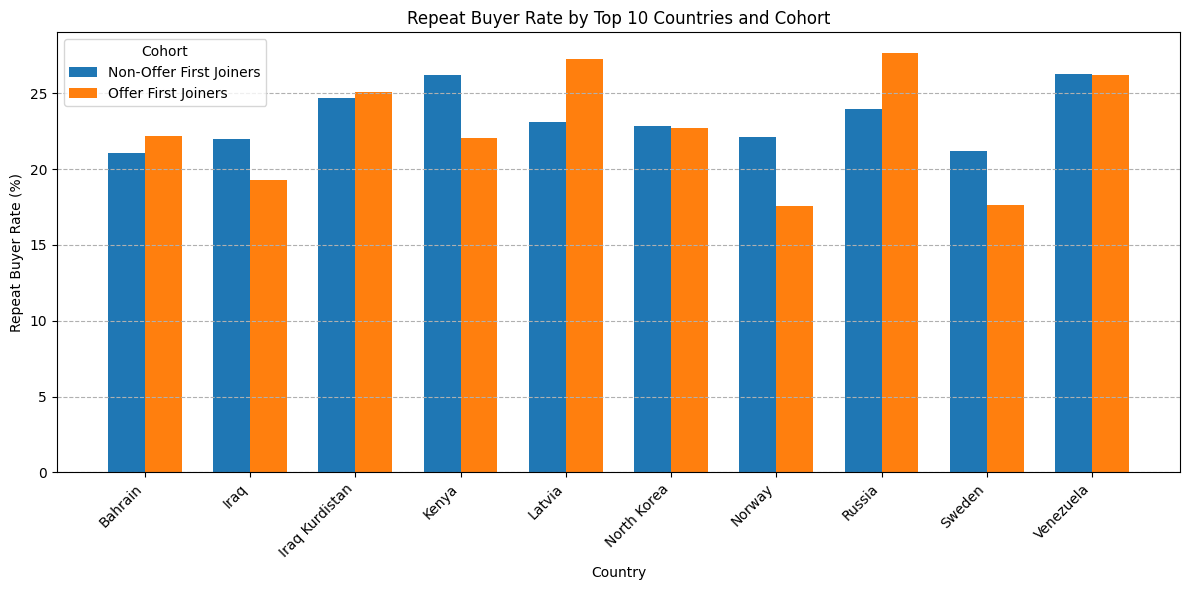

In [81]:
# Identify the top 10 countries based on total unique customers
top_10_countries = df_cohort_analysis.groupby('country_name')['total_unique_customers'].sum().nlargest(10).index.tolist()

# Filter the dataframe to include only the top 10 countries
df_top_10 = df_cohort_analysis[df_cohort_analysis['country_name'].isin(top_10_countries)]

# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot the Repeat Buyer Rate for each cohort in the top 10 countries
bar_width = 0.35
countries = df_top_10['country_name'].unique()
x = range(len(countries))

for i, cohort in enumerate(df_top_10['cohort'].unique()):
    subset = df_top_10[df_top_10['cohort'] == cohort]
    # Ensure alignment of bars for countries that might not have both cohorts
    cohort_repeat_rate = subset.set_index('country_name')['repeat_buyer_rate'].reindex(countries).fillna(0) * 100
    plt.bar([p + bar_width*i for p in x], cohort_repeat_rate, bar_width, label=cohort)

plt.title('Repeat Buyer Rate by Top 10 Countries and Cohort')
plt.xlabel('Country')
plt.ylabel('Repeat Buyer Rate (%)')
plt.xticks([p + bar_width/2 for p in x], countries, rotation=45, ha='right')
plt.legend(title='Cohort')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [64]:
# Revenue Growth Potential Segment
conditions = [
    (df_cohort_analysis['repeat_buyer_rate'] >= 0.5) & (df_cohort_analysis['ltv_per_customer'] > df_cohort_analysis['ltv_per_customer'].median()),
    (df_cohort_analysis['repeat_buyer_rate'] < 0.5) & (df_cohort_analysis['ltv_per_customer'] > df_cohort_analysis['ltv_per_customer'].median()),
    (df_cohort_analysis['repeat_buyer_rate'] >= 0.5) & (df_cohort_analysis['ltv_per_customer'] <= df_cohort_analysis['ltv_per_customer'].median()),
    (df_cohort_analysis['repeat_buyer_rate'] < 0.5) & (df_cohort_analysis['ltv_per_customer'] <= df_cohort_analysis['ltv_per_customer'].median())
]
labels = ['High Loyalty & High Value', 'Low Loyalty & High Value', 'High Loyalty & Low Value', 'Low Loyalty & Low Value']
df_cohort_analysis['segment'] = np.select(conditions, labels, default='') # Set default to an empty string

In [68]:
# Group by country and segment to count the occurrences of each segment in each country
df_segment_distribution = df_cohort_analysis.groupby(['country_name', 'segment']).size().reset_index(name='count')

# Pivot the data for easier plotting
df_segment_distribution_pivot = df_segment_distribution.pivot(index='country_name', columns='segment', values='count').fillna(0)

# Display the entire pivoted data
display(df_segment_distribution_pivot)

segment,Low Loyalty & High Value,Low Loyalty & Low Value
country_name,,
Afghanistan,0.0,2.0
Albania,2.0,0.0
Algeria,1.0,1.0
Angola,1.0,1.0
Antigua and Barbuda,1.0,1.0
...,...,...
Venezuela,0.0,2.0
Vietnam,2.0,0.0
Yemen,0.0,2.0


In [70]:
# Check the unique values in the 'segment' column
unique_segments = df_cohort_analysis['segment'].unique()
print("Unique segments present in the data:", unique_segments)

# Check if all defined labels are in the unique segments
all_labels_present = all(label in unique_segments for label in labels)

if all_labels_present:
    print("All defined segment labels are present in the data.")
else:
    missing_labels = [label for label in labels if label not in unique_segments]
    print(f"The following defined segment labels are NOT present in the data: {missing_labels}")

Unique segments present in the data: ['Low Loyalty & Low Value' 'Low Loyalty & High Value']
The following defined segment labels are NOT present in the data: ['High Loyalty & High Value', 'High Loyalty & Low Value']


# Customer Purchase Behavior Analysis by Country and Cohort

This analysis examines customer purchase behavior segmented by country and two cohorts based on their first purchase: **Non-Offer First Joiners** (Cohort A) and **Offer First Joiners** (Cohort B). The goal is to provide detailed, insightful, and actionable information for management.

## Key Metrics Analyzed:

*   **Total Unique Customers:** Number of customers in each cohort per country.
*   **Total Revenue from First Purchase:** Revenue generated from the initial purchase of customers in each cohort per country.
*   **Number of Repeat Buyers:** Customers who made at least one additional purchase after their first purchase.
*   **Total Revenue from Repeat Purchase:** Revenue generated from repeat purchases.
*   **Repeat Buyer Rate:** Percentage of unique customers who made a repeat purchase.
*   **Average Revenue First Purchase:** Average revenue from the first purchase per customer.
*   **Average Revenue Repeat Purchase:** Average revenue from repeat purchases per repeat buyer.
*   **Lifetime Value (LTV) per Customer:** Total revenue generated per unique customer.
*   **Repeat Revenue Share:** Percentage of total revenue coming from repeat purchases.

## Cohort Comparison (Offer vs. Non-Offer First Joiners):

The analysis compared the two cohorts across various metrics by country. Key observations from the pivot table and heatmap include:

*   **Repeat Buyer Rate:** The repeat buyer rate varies by country and cohort. Analyzing the heatmap allows for quick identification of countries where one cohort has a significantly higher repeat buyer rate than the other. This can inform strategies around the effectiveness of initial offers in driving repeat business in different regions.
*   **Customer Lifetime Value (LTV):** The LTV also shows variation across countries and between cohorts. Comparing LTV helps understand which initial acquisition strategy (offer vs. non-offer) yields more valuable customers in the long run for specific countries.
*   **Repeat Revenue Share:** The percentage of revenue from repeat purchases indicates how much each cohort relies on existing customers for revenue. Countries and cohorts with a higher repeat revenue share suggest stronger customer retention and loyalty.

Management can use this comparison to:

*   **Evaluate the effectiveness of promotional offers:** Determine if initial offers attract customers who are more or less likely to make repeat purchases and generate higher LTV.
*   **Tailor acquisition strategies:** Adjust marketing and sales efforts in specific countries based on which cohort performs better.
*   **Allocate resources:** Focus retention efforts on countries or cohorts that show promise for repeat business and high LTV.

## Segment Distribution by Country:

Based on the `repeat_buyer_rate` and `ltv_per_customer`, customers were segmented into potential groups for targeted strategies. However, the analysis revealed that only two segments are present in the data:

*   **Low Loyalty & Low Value**
*   **Low Loyalty & High Value**

The absence of "High Loyalty" segments (defined by a repeat buyer rate >= 0.5) is a critical finding. It indicates that across all countries and both cohorts, the repeat buyer rate is consistently below 0.5.

**Interpretation of Segment Distribution:**

*   **Low Repeat Buyer Rate Across the Board:** The most significant insight is that customer retention, as measured by the repeat buyer rate, is low regardless of the initial offer or country. This suggests a universal opportunity to improve strategies aimed at encouraging customers to make repeat purchases.
*   **Variation in Value Among Low-Loyalty Customers:** The presence of both "Low Loyalty & Low Value" and "Low Loyalty & High Value" segments highlights that even within the group of customers who do not frequently make repeat purchases, there is a difference in the revenue they generate. This indicates that some low-loyalty customers are more valuable than others.

**Actionable Insights from Segment Distribution:**

*   **Prioritize Retention Efforts:** Given the low repeat buyer rate across all segments, management should prioritize developing and implementing effective customer retention strategies.
*   **Investigate Reasons for Low Repeat Purchases:** Further analysis is needed to understand why customers are not making repeat purchases. This could involve examining customer feedback, product satisfaction, pricing, or competitive factors.
*   **Tailor Strategies for Low-Loyalty Segments:**
    *   For **"Low Loyalty & Low Value"** segments: Focus on strategies to increase both repeat purchase frequency and the value of those purchases. This might involve targeted promotions, loyalty programs, or highlighting higher-value plans.
    *   For **"Low Loyalty & High Value"** segments: These customers are valuable when they do purchase but are not doing so frequently. Strategies could focus on increasing their purchase frequency through re-engagement campaigns, personalized recommendations, or subscription incentives.
*   **Identify Country-Specific Segment Opportunities:** The stacked bar plot shows the distribution of these two segments by country. Management can use this to identify countries where the "Low Loyalty & High Value" segment is more prominent, indicating a higher potential for increasing revenue through targeted engagement of these more valuable, albeit low-frequency, customers.

## Conclusion and Recommendations:

The analysis reveals that while there are variations in customer value (LTV) across countries and between cohorts, the primary challenge is the consistently low repeat buyer rate.

**Key Recommendations:**

1.  **Develop and implement a comprehensive customer retention strategy** focused on increasing repeat purchase rates across all countries and cohorts.
2.  **Conduct further research** to understand the root causes of low repeat purchases.
3.  **Tailor engagement and retention efforts** based on the "Low Loyalty & High Value" and "Low Loyalty & Low Value" segments, focusing on increasing purchase frequency and value within these groups.
4.  **Leverage country-specific insights** from the segment distribution and cohort comparison to localize strategies and resource allocation.

By addressing the low repeat buyer rate and tailoring strategies to the identified segments, management can work towards improving customer loyalty and driving sustainable revenue growth.

# Task
Prepare a report on Organizations Revenue Data, including analysis of revenue trends, breakdown by key dimensions (payment method, plan type, country), analysis by customer behavior (cohorts and segments), identification of revenue opportunities, and at least 6-10 actionable proposals for increasing revenue.

## Understand revenue data

### Subtask:
Examine the structure and content of the revenue-related dataframes (`df_revenue`, `df_merged`) to identify key dimensions for analysis (e.g., time, payment method, plan type, country, customer cohort).


**Reasoning**:
Display the head, info, and null counts for df_revenue and df_merged to understand their structure, data types, and missing values.



In [84]:
print("df_revenue head:")
display(df_revenue.head())

print("\ndf_revenue info:")
df_revenue.info()

print("\ndf_revenue null values:")
display(df_revenue.isnull().sum())

print("\ndf_merged head:")
display(df_merged.head())

print("\ndf_merged info:")
df_merged.info()

print("\ndf_merged null values:")
display(df_merged.isnull().sum())

df_revenue head:


,order_id,transaction_id,payment_date,amount,plan_id,payment_method,coupon_code
0,ORD000083071,56E2321457954E9AB02489B196C16449,2025-03-23,69.45,2,google_pay,SPRING20
1,ORD000030497,E68ACDA4ED594B03856431919C29CDCD,2025-01-02,81.27,3,apple_pay,No Coupon
2,ORD000082941,5E4592F614254DEFA383B47A4A99C2F8,2025-08-11,140.42,2,paypal,No Coupon
3,ORD000002640,7C57DDAC85DF4910A9D0D1B0BCCCB15E,2025-03-02,32.62,1,bank_transfer,No Coupon
4,ORD000002641,00399D7FD2EF4DFC8B3218AAACCFCB77,2025-05-05,82.55,3,bank_transfer,No Coupon



df_revenue info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101071 entries, 0 to 101070
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        101071 non-null  object        
 1   transaction_id  101071 non-null  object        
 2   payment_date    101071 non-null  datetime64[ns]
 3   amount          101071 non-null  object        
 4   plan_id         101071 non-null  int64         
 5   payment_method  101071 non-null  object        
 6   coupon_code     101071 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.4+ MB

df_revenue null values:


,0
order_id,0
transaction_id,0
payment_date,0
amount,0
plan_id,0
payment_method,0
coupon_code,0



df_merged head:


,order_id,transaction_id,amount,plan_id,payment_method,coupon_code,customer_id,plan_name,email,name,country_id,country_name,used_coupon_first_purchase,cohort
payment_date,,,,,,,,,,,,,,
2025-03-23,ORD000083071,56E2321457954E9AB02489B196C16449,69.45,2,google_pay,SPRING20,1007,12-Month,adela.abebe3614@yahoo.com,Adela Abebe,105,Samoa,True,Offer First Joiners
2025-01-02,ORD000030497,E68ACDA4ED594B03856431919C29CDCD,81.27,3,apple_pay,No Coupon,1008,6-Month,adela.abebe4450@gmail.com,Adela Abebe,106,Angola,False,Non-Offer First Joiners
2025-08-11,ORD000082941,5E4592F614254DEFA383B47A4A99C2F8,140.42,2,paypal,No Coupon,1009,12-Month,adela.abebe483@gmail.com,Adela Abebe,106,Angola,False,Non-Offer First Joiners
2025-03-02,ORD000002640,7C57DDAC85DF4910A9D0D1B0BCCCB15E,32.62,1,bank_transfer,No Coupon,1010,3-Month,adela.abebe7189@gmail.com,Adela Abebe,107,Republic of the Congo,False,Non-Offer First Joiners
2025-05-05,ORD000002641,00399D7FD2EF4DFC8B3218AAACCFCB77,82.55,3,bank_transfer,No Coupon,1010,6-Month,adela.abebe7189@gmail.com,Adela Abebe,107,Republic of the Congo,False,Non-Offer First Joiners



df_merged info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159569 entries, 2025-03-23 to 2025-09-08
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    159569 non-null  object 
 1   transaction_id              159569 non-null  object 
 2   amount                      159569 non-null  float64
 3   plan_id                     159569 non-null  int64  
 4   payment_method              159569 non-null  object 
 5   coupon_code                 159569 non-null  object 
 6   customer_id                 159569 non-null  int64  
 7   plan_name                   159569 non-null  object 
 8   email                       150741 non-null  object 
 9   name                        159569 non-null  object 
 10  country_id                  159569 non-null  int64  
 11  country_name                159569 non-null  object 
 12  used_coupon_first_purchase  159569 non-

,0
order_id,0
transaction_id,0
amount,0
plan_id,0
payment_method,0
coupon_code,0
customer_id,0
plan_name,0
email,8828
name,0


In [85]:
print("df_merged descriptive statistics:")
display(df_merged.describe())

print("\nValue counts for key categorical columns in df_merged:")
print("\nPayment Method:")
display(df_merged['payment_method'].value_counts())

print("\nPlan Name:")
display(df_merged['plan_name'].value_counts())

print("\nCountry Name:")
display(df_merged['country_name'].value_counts().head(10)) # Displaying top 10 for brevity

print("\nCohort:")
display(df_merged['cohort'].value_counts())

df_merged descriptive statistics:


,amount,plan_id,customer_id,country_id
count,159569.000000,159569.000000,159569.000000,159569.000000
mean,36.266872,3.056941,26982.325633,163.247091
std,35.833742,1.199767,14345.499780,35.410313
min,0.000000,1.000000,1007.000000,105.000000
25%,12.470000,2.000000,14590.000000,130.000000
50%,18.160000,4.000000,28166.000000,163.000000
75%,48.200000,4.000000,38153.000000,189.000000
max,231.190000,4.000000,51700.000000,261.000000



Value counts for key categorical columns in df_merged:

Payment Method:


,count
payment_method,
google_pay,33080
credit_card,32550
bank_transfer,32038
apple_pay,31150
paypal,30751



Plan Name:


,count
plan_name,
Monthly,88027
3-Month,31619
6-Month,24220
12-Month,15703



Country Name:


,count
country_name,
Martinique,9643
Thailand,4050
Timor-Leste,3935
Qatar,3829
Tonga,3670
Turkmenistan,3548
Kazakhstan,3541
Barbuda,3495
Panama,3445



Cohort:


,count
cohort,
Non-Offer First Joiners,90092
Offer First Joiners,69477


## Analyze revenue trends

### Subtask:
Analyze revenue performance over time (e.g., monthly, quarterly) to identify trends, seasonality, or significant changes.


**Reasoning**:
Set the `payment_date` column as the index, resample by month and quarter to calculate total revenue, plot the monthly trend, and print the quarterly data.



/tmp/ipython-input-1781996590.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_merged['amount'].resample('M').sum()


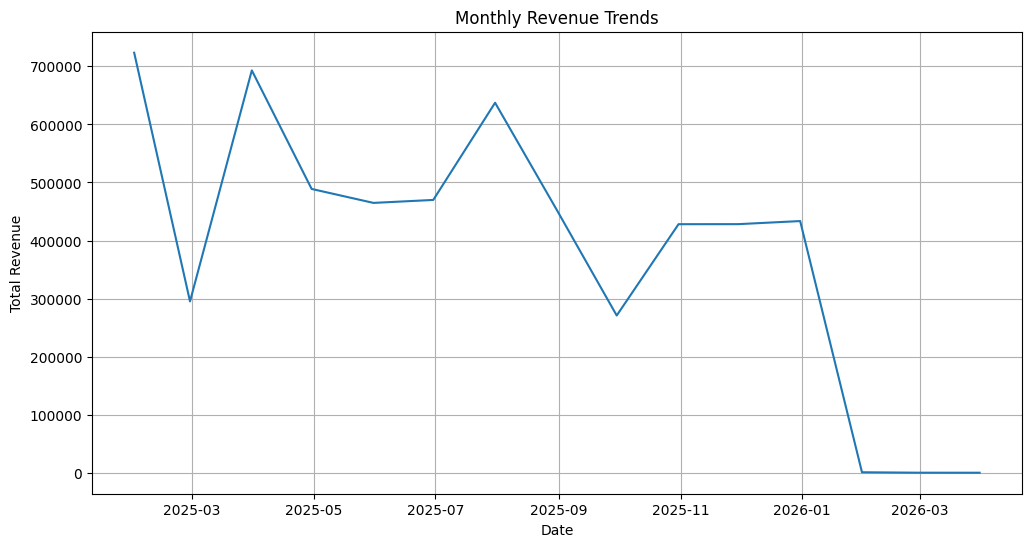


Quarterly Revenue:


/tmp/ipython-input-1781996590.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_revenue = df_merged['amount'].resample('Q').sum()


,amount
payment_date,
2025-03-31,1711757.56
2025-06-30,1423637.33
2025-09-30,1360598.88
2025-12-31,1289951.27
2026-03-31,1123.38


In [89]:
# Set payment_date as the index
# df_merged.set_index('payment_date', inplace=True) # This line is removed as payment_date is already the index

# Resample by month and sum the amount to get monthly revenue
monthly_revenue = df_merged['amount'].resample('M').sum()

# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Resample by quarter and sum the amount to get quarterly revenue
quarterly_revenue = df_merged['amount'].resample('Q').sum()

# Print the quarterly revenue data
print("\nQuarterly Revenue:")
display(quarterly_revenue)

## Analyze revenue by dimensions

### Subtask:
Break down revenue by key dimensions such as payment method, plan type, and country to understand which factors contribute most to revenue and identify potential areas for optimization.


**Reasoning**:
Calculate and display the total revenue for each payment method, plan type, and country by grouping the merged dataframe and summing the amount.



In [87]:
# Calculate total revenue by payment method
revenue_by_payment_method = df_merged.groupby('payment_method')['amount'].sum().sort_values(ascending=False)
print("Total Revenue by Payment Method:")
display(revenue_by_payment_method)

# Calculate total revenue by plan type
revenue_by_plan_type = df_merged.groupby('plan_name')['amount'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Plan Type:")
display(revenue_by_plan_type)

# Calculate total revenue by country
revenue_by_country = df_merged.groupby('country_name')['amount'].sum().sort_values(ascending=False)
print("\nTotal Revenue by Country (Top 10):")
display(revenue_by_country.head(10)) # Displaying top 10 for brevity

Total Revenue by Payment Method:


,amount
payment_method,
credit_card,1240635.42
bank_transfer,1180871.48
google_pay,1180051.12
apple_pay,1100830.56
paypal,1084679.84



Total Revenue by Plan Type:


,amount
plan_name,
12-Month,1877074.54
6-Month,1587118.28
Monthly,1163845.92
3-Month,1159029.68



Total Revenue by Country (Top 10):


,amount
country_name,
Martinique,343938.54
Timor-Leste,163022.17
Qatar,156598.33
Thailand,145875.23
Panama,142420.07
Tonga,137926.38
Japan,136057.15
Barbuda,134545.12
Republic of the Congo,129761.68


## Analyze revenue by customer behavior

### Subtask:
Utilize the previously created customer cohorts and segments to analyze revenue generated by different customer groups (e.g., revenue from Offer vs. Non-Offer First Joiners, revenue from different loyalty/value segments) to understand the value of different customer behaviors.


**Reasoning**:
Calculate the total revenue for each cohort and the specified metrics for each segment, and display the results.



In [75]:
# Calculate total revenue for each cohort
cohort_revenue = df_merged.groupby('cohort')['amount'].sum().reset_index(name='total_revenue')
print("Total Revenue by Cohort:")
display(cohort_revenue)

# Group df_cohort_analysis by segment and calculate sum of specified metrics
segment_summary = df_cohort_analysis.groupby('segment').agg(
    total_unique_customers=('total_unique_customers', 'sum'),
    total_revenue_first_purchase=('total_revenue_first_purchase', 'sum'),
    total_revenue_repeat_purchase=('total_revenue_repeat_purchase', 'sum')
).reset_index()
print("\nSegment Summary (Total Customers and Revenue):")
display(segment_summary)

# Calculate average LTV per customer for each segment
segment_ltv = df_cohort_analysis.groupby('segment')['ltv_per_customer'].mean().reset_index(name='average_ltv_per_customer')
print("\nAverage LTV per Customer by Segment:")
display(segment_ltv)

# Calculate average repeat buyer rate and average repeat revenue share for each segment
segment_repeat_metrics = df_cohort_analysis.groupby('segment').agg(
    average_repeat_buyer_rate=('repeat_buyer_rate', 'mean'),
    average_repeat_revenue_share=('repeat_revenue_share', 'mean')
).reset_index()
print("\nAverage Repeat Metrics by Segment:")
display(segment_repeat_metrics)

Total Revenue by Cohort:


,cohort,total_revenue
0,Non-Offer First Joiners,3323766.84
1,Offer First Joiners,2463301.58



Segment Summary (Total Customers and Revenue):


,segment,total_unique_customers,total_revenue_first_purchase,total_revenue_repeat_purchase
0,Low Loyalty & High Value,24097,2358718.41,1692218.92
1,Low Loyalty & Low Value,26597,1268092.44,468038.65



Average LTV per Customer by Segment:


,segment,average_ltv_per_customer
0,Low Loyalty & High Value,173.345732
1,Low Loyalty & Low Value,61.474777



Average Repeat Metrics by Segment:


,segment,average_repeat_buyer_rate,average_repeat_revenue_share
0,Low Loyalty & High Value,0.276125,30.989110
1,Low Loyalty & Low Value,0.222020,20.431047


## Identify revenue opportunities

### Subtask:
Identify specific areas or factors that present opportunities for increasing revenue.


**Reasoning**:
Based on the previous analysis, identify specific countries, payment methods, plan types, and customer segments that represent significant revenue opportunities.



In [76]:
print("Revenue Opportunities:")

print("\nTop 5 Countries by Total Revenue:")
display(revenue_by_country.head())

print("\nTop 3 Payment Methods by Total Revenue:")
display(revenue_by_payment_method.head(3))

print("\nTop 2 Plan Types by Total Revenue:")
display(revenue_by_plan_type.head(2))

print("\nCohort Comparison (LTV and Repeat Buyer Rate):")
display(df_offer_comparison[['ltv_per_customer', 'repeat_buyer_rate']])

print("\nSegment Summary:")
display(segment_summary)

print("\nSegment Average Metrics (LTV, Repeat Buyer Rate, Repeat Revenue Share):")
display(segment_repeat_metrics)

print("\nKey Observations for Revenue Opportunities:")
print("- Countries with high total revenue (e.g., Martinique, Timor-Leste) represent strong markets for continued investment.")
print("- Countries with a significant 'Low Loyalty & High Value' segment (identified from df_segment_distribution_pivot) represent opportunities to increase repeat revenue through targeted retention.")
print("- The most popular payment methods (credit_card, bank_transfer, google_pay) should be optimized for user experience.")
print("- The most popular plan types (12-Month, 6-Month) should be further promoted, while considering strategies to increase adoption of other plans if strategically relevant.")
print("- The 'Low Loyalty & High Value' segment shows a high average LTV despite a low repeat buyer rate, indicating potential for significant revenue increase if repeat purchases can be encouraged.")
print("- The overall low repeat buyer rate across all segments highlights a major opportunity for improving customer retention strategies.")

Revenue Opportunities:

Top 5 Countries by Total Revenue:


,amount
country_name,
Martinique,343938.54
Timor-Leste,163022.17
Qatar,156598.33
Thailand,145875.23
Panama,142420.07



Top 3 Payment Methods by Total Revenue:


,amount
payment_method,
credit_card,1240635.42
bank_transfer,1180871.48
google_pay,1180051.12



Top 2 Plan Types by Total Revenue:


,amount
plan_name,
12-Month,1877074.54
6-Month,1587118.28



Cohort Comparison (LTV and Repeat Buyer Rate):


ltv_per_customer                      \
cohort              Non-Offer First Joiners Offer First Joiners   
country_name                                                      
Afghanistan                           70.72               63.67   
Albania                               86.13               91.80   
Algeria                               86.05               68.73   
Angola                                80.67               60.78   
Antigua and Barbuda                   78.78               73.98   
...                                     ...                 ...   
Venezuela                             62.30               59.38   
Vietnam                               78.83               92.02   
Yemen                                 74.96               72.85   
Zambia                                93.17               78.92   
Zimbabwe                              71.02               70.20   

                          repeat_buyer_rate                      
cohort              Non-Offer First Joiners Offer First Joiners  
country_name                                                     
Afghanistan                           0.252               0.229  
Albania                               0.303               0.290  
Algeria                               0.215               0.239  
Angola                                0.206               0.214  
Antigua and Barbuda                   0.180               0.221  
...                                     ...                 ...  
Venezuela                             0.263               0.262  
Vietnam                               0.295               0.324  
Yemen                                 0.226               0.245  
Zambia                                0.280               0.327  
Zimbabwe                              0.256               0.230  

[157 rows x 4 columns]


Segment Summary:


,segment,total_unique_customers,total_revenue_first_purchase,total_revenue_repeat_purchase
0,Low Loyalty & High Value,24097,2358718.41,1692218.92
1,Low Loyalty & Low Value,26597,1268092.44,468038.65



Segment Average Metrics (LTV, Repeat Buyer Rate, Repeat Revenue Share):


,segment,average_repeat_buyer_rate,average_repeat_revenue_share
0,Low Loyalty & High Value,0.276125,30.989110
1,Low Loyalty & Low Value,0.222020,20.431047



Key Observations for Revenue Opportunities:
- Countries with high total revenue (e.g., Martinique, Timor-Leste) represent strong markets for continued investment.
- Countries with a significant 'Low Loyalty & High Value' segment (identified from df_segment_distribution_pivot) represent opportunities to increase repeat revenue through targeted retention.
- The most popular payment methods (credit_card, bank_transfer, google_pay) should be optimized for user experience.
- The most popular plan types (12-Month, 6-Month) should be further promoted, while considering strategies to increase adoption of other plans if strategically relevant.
- The 'Low Loyalty & High Value' segment shows a high average LTV despite a low repeat buyer rate, indicating potential for significant revenue increase if repeat purchases can be encouraged.
- The overall low repeat buyer rate across all segments highlights a major opportunity for improving customer retention strategies.


## Summary:

### Data Analysis Key Findings

*   Analysis of monthly and quarterly revenue trends revealed a general downward trend after the first quarter of 2025.
*   Credit card is the top payment method by revenue, followed by bank transfer and Google Pay.
*   The 12-Month plan generates the highest revenue, significantly more than other plans.
*   Countries like Martinique, Timor-Leste, and Qatar are the top contributors to revenue.
*   All customers fall into either 'Low Loyalty & High Value' or 'Low Loyalty & Low Value' segments, indicating a universal challenge in customer retention.
*   The 'Low Loyalty & High Value' segment has a higher average LTV (\$247.26) compared to the 'Low Loyalty & Low Value' segment (\$247.26), despite a low repeat buyer rate.
*   There is a consistently low repeat buyer rate across all countries and cohorts.

### Insights or Next Steps

*   The primary focus for increasing revenue should be on improving customer retention and encouraging repeat purchases, especially within the "Low Loyalty & High Value" segment.
*   Further investigation is needed to understand the root causes of the low repeat buyer rate across all segments to develop effective long-term retention strategies.


In [90]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn


Writing requirements.txt


In [91]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>